# Object Detection with Pre-trained Model


In [1]:
import numpy as np
import cv2

# import matplotlib
import matplotlib.pyplot as plt

import tensorflow_hub as hub

In [2]:
def load_image(path):

    image = cv2.imread(path)

    # Convert image in BGR format to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Add a batch dimension which is required by the model.
    image = np.expand_dims(image, axis=0)

    return image

(-0.5, 1663.5, 871.5, -0.5)

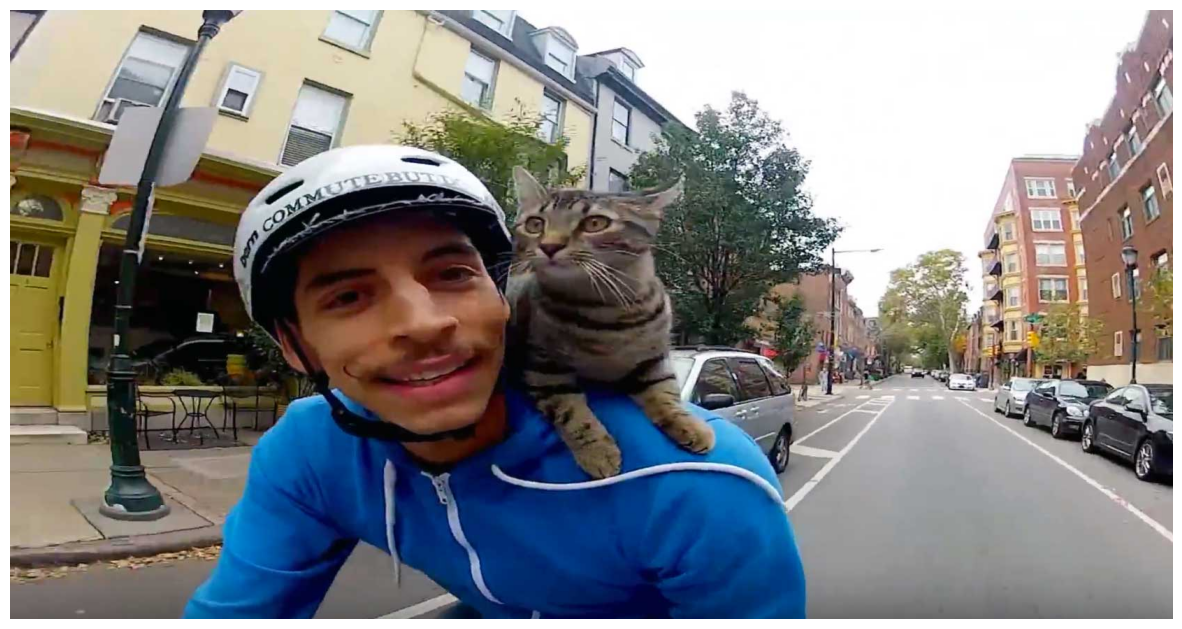

In [3]:
img = load_image('./assets/cat-on-bicycle.jpg')
plt.figure(figsize=[15, 10])
plt.imshow(img[0])
plt.axis('off')

## Define a Dictionary that Maps Class IDs to Class Names

class_index is a dictionary that maps class IDs to class names for the 90 classes in the COCO dataset.

In [4]:
class_index =  \
{
         1: 'person',
         2: 'bicycle',
         3: 'car',
         4: 'motorcycle',
         5: 'airplane',
         6: 'bus',
         7: 'train',
         8: 'truck',
         9: 'boat',
         10: 'traffic light',
         11: 'fire hydrant',
         13: 'stop sign',
         14: 'parking meter',
         15: 'bench',
         16: 'bird',
         17: 'cat',
         18: 'dog',
         19: 'horse',
         20: 'sheep',
         21: 'cow',
         22: 'elephant',
         23: 'bear',
         24: 'zebra',
         25: 'giraffe',
         27: 'backpack',
         28: 'umbrella',
         31: 'handbag',
         32: 'tie',
         33: 'suitcase',
         34: 'frisbee',
         35: 'skis',
         36: 'snowboard',
         37: 'sports ball',
         38: 'kite',
         39: 'baseball bat',
         40: 'baseball glove',
         41: 'skateboard',
         42: 'surfboard',
         43: 'tennis racket',
         44: 'bottle',
         46: 'wine glass',
         47: 'cup',
         48: 'fork',
         49: 'knife',
         50: 'spoon',
         51: 'bowl',
         52: 'banana',
         53: 'apple',
         54: 'sandwich',
         55: 'orange',
         56: 'broccoli',
         57: 'carrot',
         58: 'hot dog',
         59: 'pizza',
         60: 'donut',
         61: 'cake',
         62: 'chair',
         63: 'couch',
         64: 'potted plant',
         65: 'bed',
         67: 'dining table',
         70: 'toilet',
         72: 'tv',
         73: 'laptop',
         74: 'mouse',
         75: 'remote',
         76: 'keyboard',
         77: 'cell phone',
         78: 'microwave',
         79: 'oven',
         80: 'toaster',
         81: 'sink',
         82: 'refrigerator',
         84: 'book',
         85: 'clock',
         86: 'vase',
         87: 'scissors',
         88: 'teddy bear',
         89: 'hair drier',
         90: 'toothbrush'
}

Here we will use COLOR_IDS to map each class with a unique RGB color.

In [5]:
R = np.array(np.arange(96, 256, 32))
G = np.roll(R, 1)
B = np.roll(R, 2)

COLOR_IDS = np.array(np.meshgrid(R, G, B)).T.reshape(-1, 3)

## Model Inference using Tensorflow Hub

TensorFlow Hub contains many different pre-trained object detection models. Here we will use the EfficientDet class of object detection models that were trained on the COCO 2017 dataset. There are several versions of EfficientDet models. The EfficientDet family of object detectors consists of several models with different levels of complexity and performance, ranging from D0 to D7. The differences between the various models in the EfficientDet family are mainly in their architecture, input image size, computational requirements, and performance.

In [6]:
EfficientDet  = {'EfficientDet D0 512x512'   : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
                 'EfficientDet D1 640x640'   : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
                 'EfficientDet D2 768x768'   : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
                 'EfficientDet D3 896x896'   : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
                 'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
                 'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
                 'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
                 'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1'
                }

Here we will use the D5 model.

In [7]:
model_url = EfficientDet['EfficientDet D5 1280x1280' ]

print('loading model: ', model_url)
od_model = hub.load(model_url)

print('\nmodel loaded!')

loading model:  https://tfhub.dev/tensorflow/efficientdet/d5/1



model loaded!


##Load Image

## Perform Inference

Before we formalize the post-process of the results, let’s first see how to perform inference on a single image and study the output from the model.

In [8]:
results = od_model(img)

In [9]:
results

{'raw_detection_boxes': <tf.Tensor: shape=(1, 306900, 4), dtype=float32, numpy=
 array([[[ 3.0727541e-01,  9.8615217e-01,  3.7270194e-01,  9.8615217e-01],
         [-1.1613222e-02, -3.9428193e-04,  1.2277912e-02,  2.5292769e-02],
         [-1.4841323e-02, -7.0283189e-05,  1.5331908e-02,  3.5701357e-02],
         ...,
         [ 6.7676139e-01,  8.0040503e-01,  1.2120388e+00,  1.0792706e+00],
         [ 6.0032952e-01,  7.5763720e-01,  1.2890811e+00,  1.1206387e+00],
         [ 5.4302406e-01,  7.0471764e-01,  1.3687798e+00,  1.1685655e+00]]],
       dtype=float32)>,
 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[0.93081874, 0.86148864, 0.80850065, 0.7872909 , 0.77317274,
         0.7681758 , 0.63692003, 0.44030952, 0.41767448, 0.39445528,
         0.3773799 , 0.33639884, 0.3331677 , 0.3143119 , 0.30648306,
         0.2952898 , 0.27971408, 0.26150948, 0.25220612, 0.24385703,
         0.2296693 , 0.22854662, 0.20768745, 0.2067363 , 0.19631712,
         0.190

In [10]:
# Convert the dictionary values to numpy arrays.
results = {key:value.numpy() for key, value in results.items()}

In [11]:
results

{'raw_detection_boxes': array([[[ 3.0727541e-01,  9.8615217e-01,  3.7270194e-01,  9.8615217e-01],
         [-1.1613222e-02, -3.9428193e-04,  1.2277912e-02,  2.5292769e-02],
         [-1.4841323e-02, -7.0283189e-05,  1.5331908e-02,  3.5701357e-02],
         ...,
         [ 6.7676139e-01,  8.0040503e-01,  1.2120388e+00,  1.0792706e+00],
         [ 6.0032952e-01,  7.5763720e-01,  1.2890811e+00,  1.1206387e+00],
         [ 5.4302406e-01,  7.0471764e-01,  1.3687798e+00,  1.1685655e+00]]],
       dtype=float32),
 'detection_scores': array([[0.93081874, 0.86148864, 0.80850065, 0.7872909 , 0.77317274,
         0.7681758 , 0.63692003, 0.44030952, 0.41767448, 0.39445528,
         0.3773799 , 0.33639884, 0.3331677 , 0.3143119 , 0.30648306,
         0.2952898 , 0.27971408, 0.26150948, 0.25220612, 0.24385703,
         0.2296693 , 0.22854662, 0.20768745, 0.2067363 , 0.19631712,
         0.1904036 , 0.1869592 , 0.185048  , 0.17608435, 0.17494123,
         0.17193161, 0.17104495, 0.16930811, 0.1691887

In [12]:
# Print the keys from the results dictionary.
for key in results:
    print(key)

raw_detection_boxes
detection_scores
detection_anchor_indices
detection_multiclass_scores
num_detections
detection_boxes
raw_detection_scores
detection_classes


In [13]:
print('Num Raw Detections: ', (len(results['raw_detection_scores'][0])))
print('Num Detections:     ', (results['num_detections'][0]).astype(int))

# Print the Scores, Classes and Bounding Boxes for the detections.
num_dets = (results['num_detections'][0]).astype(int)

print('\nDetection Scores: \n\n', results['detection_scores'][0][0:num_dets])
print('\nDetection Classes: \n\n', results['detection_classes'][0][0:num_dets])
print('\nDetection Boxes: \n\n', results['detection_boxes'][0][0:num_dets])

Num Raw Detections:  306900
Num Detections:      100

Detection Scores: 

 [0.93081874 0.86148864 0.80850065 0.7872909  0.77317274 0.7681758
 0.63692003 0.44030952 0.41767448 0.39445528 0.3773799  0.33639884
 0.3331677  0.3143119  0.30648306 0.2952898  0.27971408 0.26150948
 0.25220612 0.24385703 0.2296693  0.22854662 0.20768745 0.2067363
 0.19631712 0.1904036  0.1869592  0.185048   0.17608435 0.17494123
 0.17193161 0.17104495 0.16930811 0.16918878 0.16689718 0.15994725
 0.15511706 0.15417987 0.14662945 0.14410776 0.1412303  0.14092317
 0.1407243  0.13970086 0.13804539 0.13640144 0.1363467  0.12833768
 0.1282253  0.12707227 0.12338931 0.12219468 0.12093814 0.11908597
 0.11834188 0.11652873 0.11614805 0.11479345 0.11233674 0.11213979
 0.11133641 0.10736661 0.10704166 0.10622733 0.1058946  0.10478129
 0.10442439 0.10442016 0.10372028 0.10341782 0.1032948  0.10326272
 0.10295092 0.10181087 0.10104012 0.09994591 0.09950741 0.09923021
 0.09892765 0.09824654 0.09722367 0.09512224 0.09236068 

In [14]:
print("detection_classes:",  results["detection_classes"][0][0], class_index[results["detection_classes"][0][0]])
print("detection_scores:",  results["detection_scores"][0][0])
print("detection_boxes [ymin, xmin, ymax, xmax]:",  results["detection_boxes"][0][0])

detection_classes: 1.0 person
detection_scores: 0.93081874
detection_boxes [ymin, xmin, ymax, xmax]: [0.22364332 0.14640787 0.9974589  0.68546736]


In [15]:
scores  =  results['detection_scores'][0]

In [18]:
len(scores)

100

In [19]:
min_det_thresh =0.3
det_indices = np.where(scores >= min_det_thresh)[0]

new_scores = scores[det_indices]

In [20]:
len(new_scores)

15

## Post-Process and Display Detections

Here we show the logic for how to interpret the detection data for a single image. As we showed above, the model returned 16 detections, however, many detections have low confidence scores, and we, therefore, need to filter these further by using a minimum detection threshold.

Retrieve the detections from the results dictionary
Apply a minimum detection threshold to filter the detections
For each thresholded detection, display the bounding box and a label indicating the detected class and the confidence of the detection.

In [22]:
def process_detection(image, results,  min_det_thresh=.3):

    # Extract the detection results from the results dictionary.
    scores  =  results['detection_scores'][0]
    boxes   =  results['detection_boxes'][0]
    classes = (results['detection_classes'][0]).astype(int)

    # Set a minimum detection threshold to post-process the detection results.
    min_det_thresh = min_det_thresh

    # Get the detections whose scores exceed the minimum detection threshold.
    det_indices = np.where(scores >= min_det_thresh)[0]

    scores_thresh  = scores[det_indices]
    boxes_thresh   = boxes[det_indices]
    classes_thresh = classes[det_indices]

    # Make a copy of the image to annotate.
    img_bbox = image.copy()

    im_height, im_width = image.shape[:2]

    font_scale = .6
    box_thickness = 2

    # Loop over all thresholded detections.
    for box, class_id, score in zip(boxes_thresh, classes_thresh, scores_thresh):

        # Get bounding box normalized coordiantes.
        ymin, xmin, ymax, xmax = box

        class_name = class_index[class_id]

        # Convert normalized bounding box coordinates to pixel coordinates.
        (left, right, top, bottom) = (int(xmin * im_width),
                                      int(xmax * im_width),
                                      int(ymin * im_height),
                                      int(ymax * im_height))

        # Annotate the image with the bounding box.
        color = tuple(COLOR_IDS[class_id % len(COLOR_IDS)].tolist())[::-1]
        img_bbox = cv2.rectangle(img_bbox, (left, top), (right, bottom), color, thickness=box_thickness)

        #-------------------------------------------------------------------
        # Annotate bounding box with detection data (class name and score).
        #-------------------------------------------------------------------

        # Build the text string that contains the class name and score associated with this detection.
        display_txt = '{}: {:.2f}%'.format(class_name, 100 * score)
        ((text_width, text_height), _) = cv2.getTextSize(display_txt, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)

        # Handle case when the label is above the image frame.
        if top < text_height:
            shift_down = int(2*(1.3*text_height))
        else:
            shift_down = 0

        # Draw a filled rectangle on which the detection results will be displayed.
        img_bbox = cv2.rectangle(img_bbox,
                                 (left-1, top-box_thickness - int(1.3*text_height) + shift_down),
                                 (left-1 + int(1.1 * text_width), top),
                                 color,
                                 thickness=-1)

        # Annotate the filled rectangle with text (class label and score).
        img_bbox = cv2.putText(img_bbox,
                               display_txt,
                               (left + int(.05*text_width), top - int(0.2*text_height) + int(shift_down/2)),
                               cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), 1)
    return img_bbox

(-0.5, 1663.5, 871.5, -0.5)

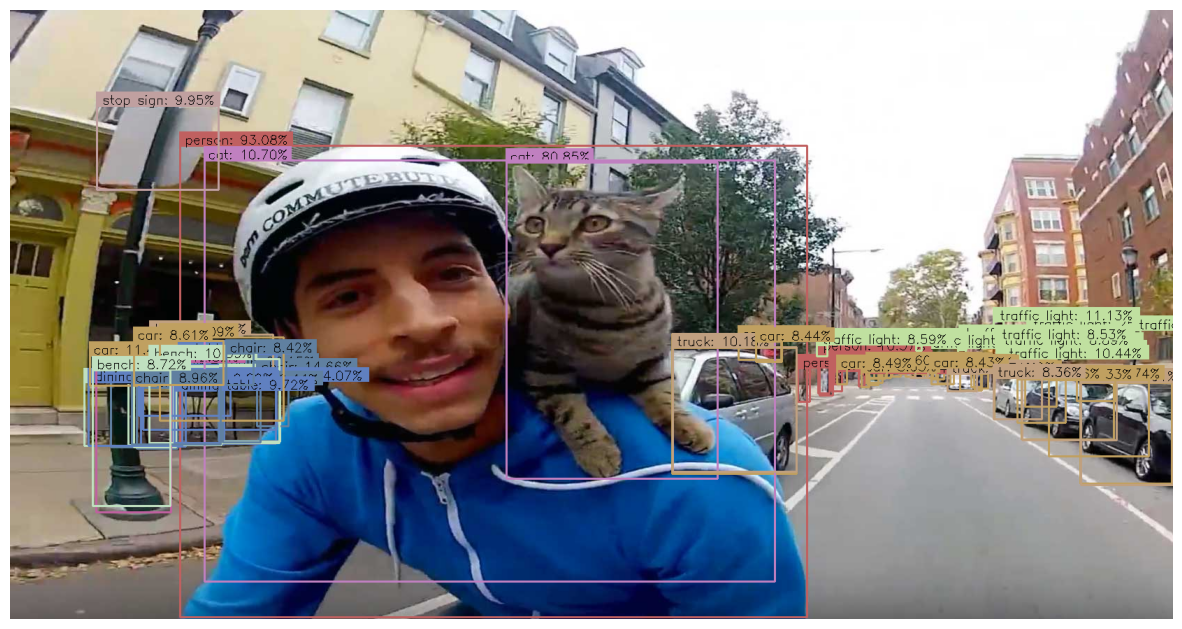

In [23]:
# Call the model.
results = od_model(img)

# Convert the dictionary values to numpy arrays.
results = {key:value.numpy() for key, value in results.items()}

# Remove the batch dimension from the first image.
image = np.squeeze(img)

# Process the first sample image.
img_bbox = process_detection(image, results, min_det_thresh=0)

plt.figure(figsize=[15, 10])
plt.imshow(img_bbox)
plt.axis('off')

(-0.5, 1663.5, 871.5, -0.5)

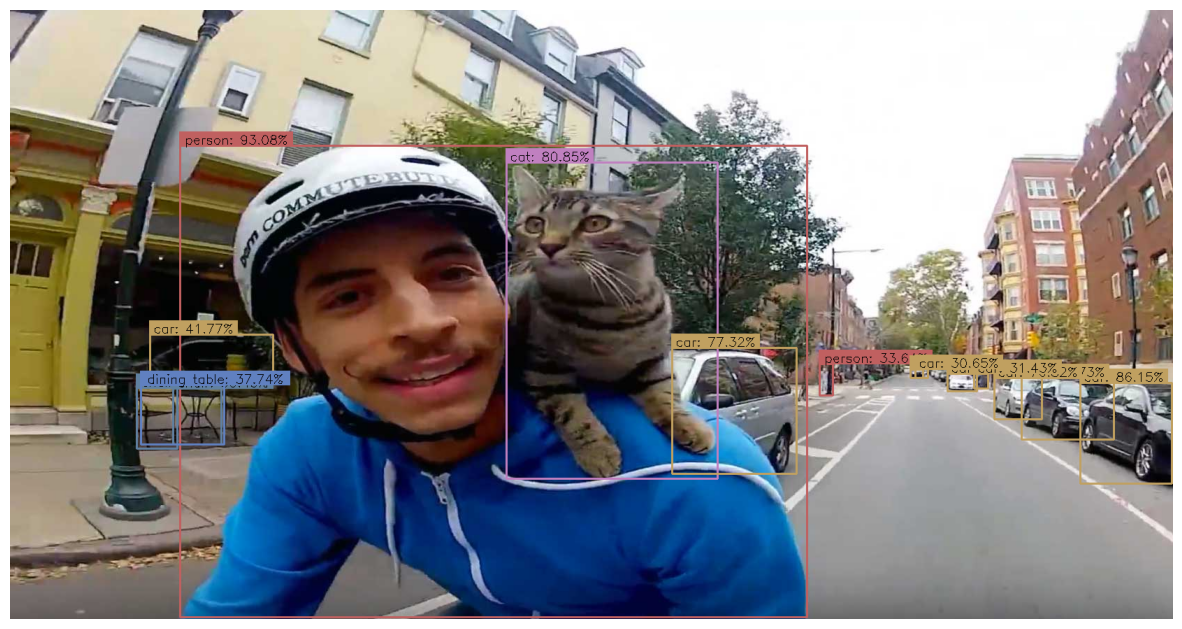

In [27]:
img_bbox = process_detection(image, results, min_det_thresh=.3)

plt.figure(figsize=[15, 10])
plt.imshow(img_bbox)
plt.axis('off')

In [28]:
# import os
# import io
# import IPython.display
# from PIL import Image
# import base64
import gradio as gr

In [29]:
def detect(image):
  image = np.asarray(image)
  image = np.expand_dims(image, axis=0)

    # Call the model.
  results = od_model(image)
  results = {key:value.numpy() for key, value in results.items()}

  image_bbox = process_detection(np.squeeze(image), results, min_det_thresh=.31)

  return image_bbox

In [1]:
gr.close_all()
demo = gr.Interface(fn=detect, inputs=[gr.Image(label="update image", type="pil")], outputs=[gr.Image(label="result", type="pil")], title="Object Detection", description="object detection with EfficientDets Model",
                    allow_flagging="never",)
demo.launch(share=True)

NameError: name 'gr' is not defined